<a href="https://colab.research.google.com/github/Bia1908/Sitemap/blob/main/trabalhomarcelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando dataset CIFAR-10 (completo)...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Dataset carregado: 50000 imagens de treino, 10000 imagens de teste.
Aplicando reshape...
Normalizando dados...
Pré-processamento concluído.
Iniciando treinamento dos modelos. ISSO VAI DEMORAR BASTANTE.

TREINANDO: Regressão Logística
Por favor, aguarde... pode levar muitos minutos.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Treinamento concluído. Fazendo previsões nos 10.000 dados de teste...

--- Relatório de Classificação ---
              precision    recall  f1-score   support

       avião       0.44      0.46      0.45      1000
   automóvel       0.46      0.45      0.45      1000
     pássaro       0.30      0.28      0.29      1000
        gato       0.26      0.26      0.26      1000
       cervo       0.33      0.29      0.31      1000
    cachorro       0.31      0.32      0.31      1000
        sapo       0.39      0.44      0.42      1000
      cavalo       0.45      0.42      0.44      1000
       navio       0.48      0.52      0.50      1000
    caminhão       0.43      0.45      0.44      1000

    accuracy                           0.39     10000
   macro avg       0.39      0.39      0.39     10000
weighted avg       0.39      0.39      0.39     10000

Acurácia Geral: 0.3881
Tempo de Treino: 7625.26 segundos (ou 127.09 minutos)
Gerando Matriz de Confusão...
Matriz de confusão salva com

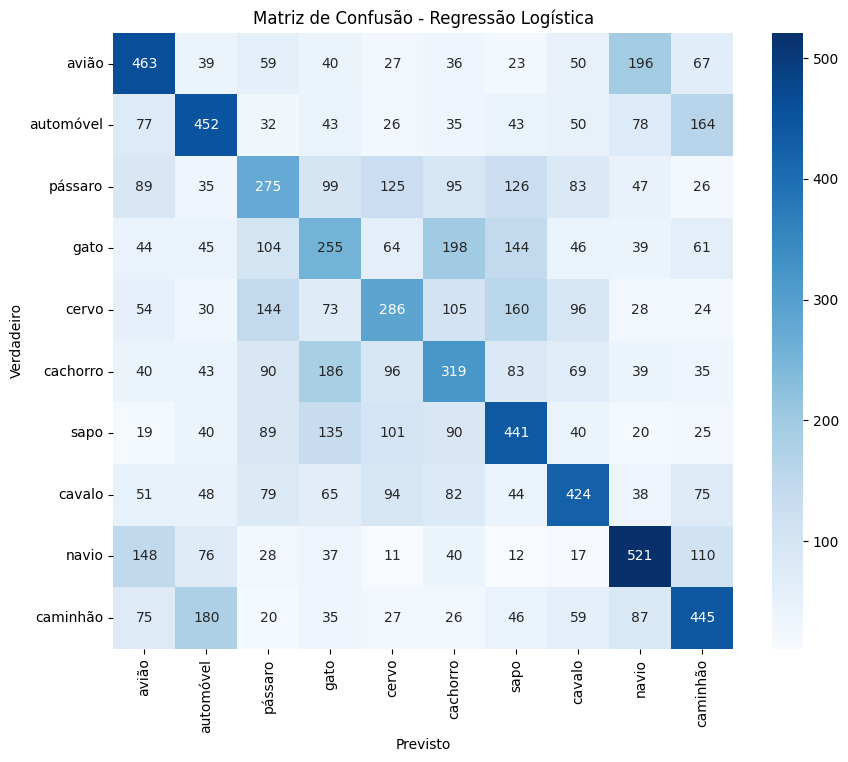

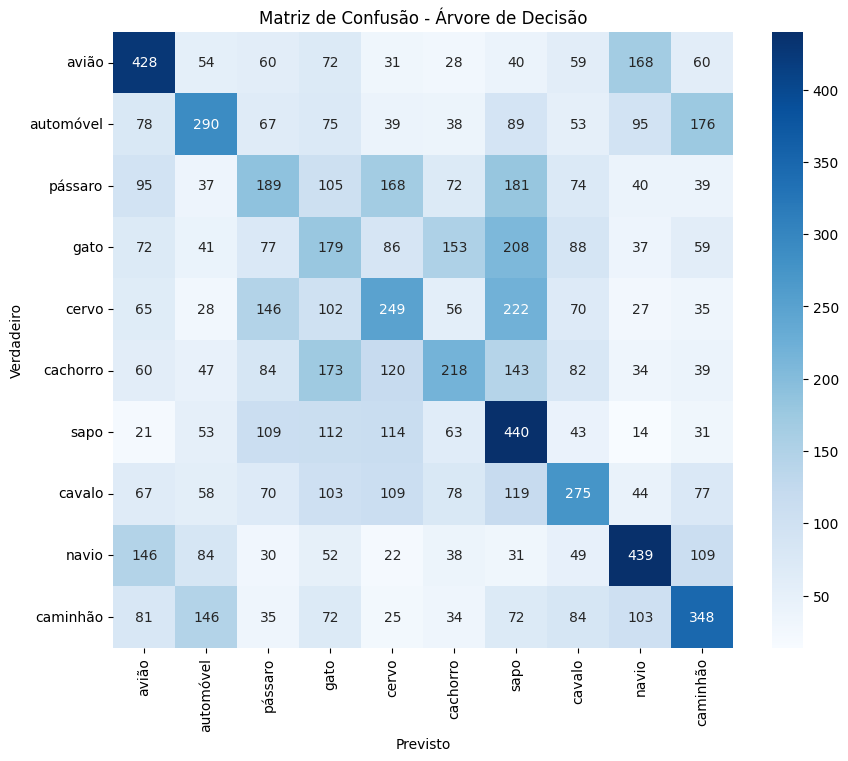

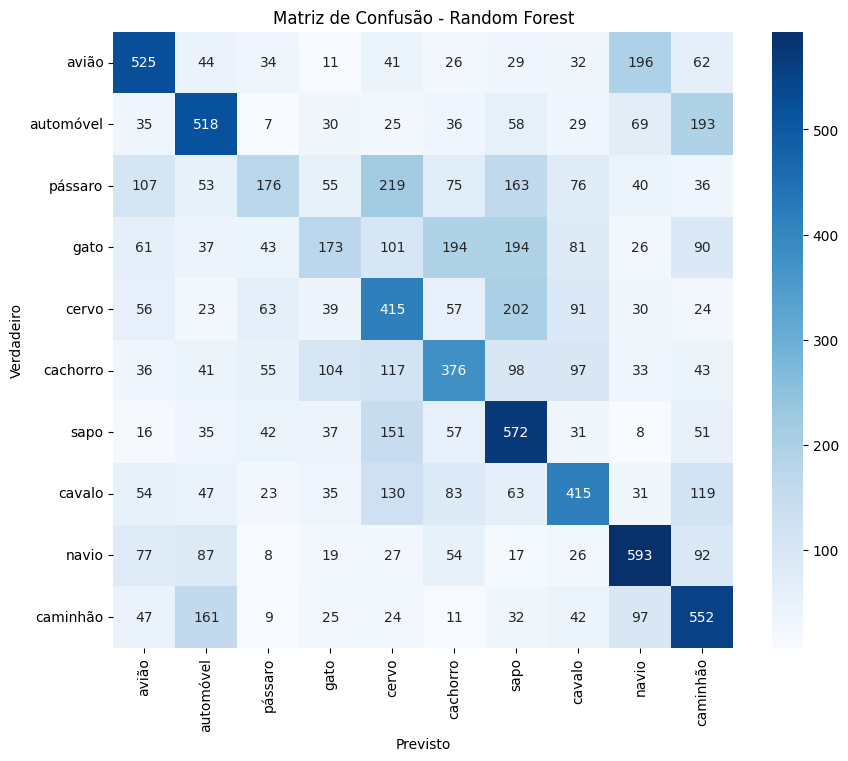

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Substituí o K-NN por este

# --- 1. Carregar os Dados (Código Fornecido) ---
print("Carregando dataset CIFAR-10 (completo)...")
(XTreino, YTreino), (XTeste, YTeste) = keras.datasets.cifar10.load_data()
print(f"Dataset carregado: {XTreino.shape[0]} imagens de treino, {XTeste.shape[0]} imagens de teste.")


# --- 2. Preparar os Vetores (Código Fornecido) ---

# 2.1. Reshape (Achatamento)
# As imagens CIFAR-10 são 32x32x3. Para o Scikit-Learn, precisamos de um vetor 1D (32*32*3 = 3072)
print("Aplicando reshape...")
XTreino_reshaped = XTreino.reshape(XTreino.shape[0], -1)
XTeste_reshaped = XTeste.reshape(XTeste.shape[0], -1)

# 2.2. Normalização (pixels de 0-255 para 0-1)
print("Normalizando dados...")
XTreino_normalized = XTreino_reshaped / 255.0
XTeste_normalized = XTeste_reshaped / 255.0

# 2.3. Achatamento dos labels Y
YTreino_flat = YTreino.flatten()
YTeste_flat = YTeste.flatten()

# Nomes das classes do CIFAR-10 para os gráficos
nomes_classes = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo',
                 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

print("Pré-processamento concluído.")
print("Iniciando treinamento dos modelos. ISSO VAI DEMORAR BASTANTE.")

# --- 3. Definir e Treinar os Classificadores ---

# Dicionário com os modelos que vamos testar
modelos = {
    # Aumentei max_iter para 1000, pois 100 é pouco para 50k amostras.
    "Regressão Logística": LogisticRegression(solver='saga', max_iter=1000, multi_class='multinomial', random_state=42, n_jobs=-1),

    # max_depth=10 para evitar overfitting extremo e diminuir tempo de treino.
    "Árvore de Decisão": DecisionTreeClassifier(max_depth=10, random_state=42),

    # Substituto do K-NN. n_jobs=-1 usa todos os processadores.
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
}

# Dicionário para guardar os resultados
resultados = {}

for nome_modelo, modelo in modelos.items():
    print("\n" + "="*40)
    print(f"TREINANDO: {nome_modelo}")
    print("Por favor, aguarde... pode levar muitos minutos.")
    print("="*40)

    # Medir tempo de treino
    start_time = time.time()
    modelo.fit(XTreino_normalized, YTreino_flat)
    end_time = time.time()
    tempo_treino = end_time - start_time

    # Fazer previsões
    print("Treinamento concluído. Fazendo previsões nos 10.000 dados de teste...")
    YPred = modelo.predict(XTeste_normalized)

    # --- 4. Avaliar Métricas ---
    print("\n--- Relatório de Classificação ---")
    report = classification_report(YTeste_flat, YPred, target_names=nomes_classes)
    print(report)

    acc = accuracy_score(YTeste_flat, YPred)
    print(f"Acurácia Geral: {acc:.4f}")
    print(f"Tempo de Treino: {tempo_treino:.2f} segundos (ou {tempo_treino/60:.2f} minutos)")

    # Guardar resultados
    resultados[nome_modelo] = report

    # --- 5. Gerar Matriz de Confusão (Item 2) ---
    print("Gerando Matriz de Confusão...")
    cm = confusion_matrix(YTeste_flat, YPred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=nomes_classes, yticklabels=nomes_classes)
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')

    # Salvar a imagem da matriz
    nome_arquivo = f'matriz_confusao_{nome_modelo.replace(" ", "_")}.png'
    plt.savefig(nome_arquivo, dpi=150, bbox_inches='tight')
    print(f"Matriz de confusão salva como: {nome_arquivo}")
    # plt.show() # Descomente se estiver rodando localmente e quiser ver o gráfico

print("\nAnálise completa de todos os modelos concluída!")